#import the librarias


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# Import libraries

#read the data

In [ ]:
data = pd.read_csv("diabetes2.csv")

#some information about the data

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


we notice from the description of data that the 25% of the data is zeros in Insuin and SkinThickness and there is a large number need to handle

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


we notice that the data dosen't contain any string values to handle

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

check for the nullablity

In [ ]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.isna()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


we notice that the feauture pregancies contanis many values so it need more handling because there is two possiblites preganant or non preganant

In [ ]:
data['Pregnancies']

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [ ]:
print("Number of 0's for Glucose:", data['Glucose'].value_counts()[0])

print("Number of 0's for Blood Pressure:", data['BloodPressure'].value_counts()[0])
print("Number of 0's for Skin Thickness:", data['SkinThickness'].value_counts()[0])
print("Number of 0's for Insulin:", data['Insulin'].value_counts()[0])
print("Number of 0's for BMI:", data['BMI'].value_counts()[0])

Number of 0's for Glucose: 5
Number of 0's for Blood Pressure: 35
Number of 0's for Skin Thickness: 227
Number of 0's for Insulin: 374
Number of 0's for BMI: 11


#clean the data

take a copy of data to keep our original data

In [ ]:
data2=data.copy()

to get rid of many zeros

In [ ]:
data2['Glucose'] = data2['Glucose'].replace(0,data['Glucose'].mean())
data2['BloodPressure'] =data2['BloodPressure'].replace(0,data['BloodPressure'].mean())
data2['SkinThickness'] = data2['SkinThickness'].replace(0,data['SkinThickness'].mean())
data2['Insulin'] = data2['Insulin'].replace(0,data['Insulin'].mean())
data2['BMI'] = data2['BMI'].replace(0,data['BMI'].mean())


In [ ]:
data2['Pregnancies'].values[data2['Pregnancies'] > 0] = 1


#visulation the data

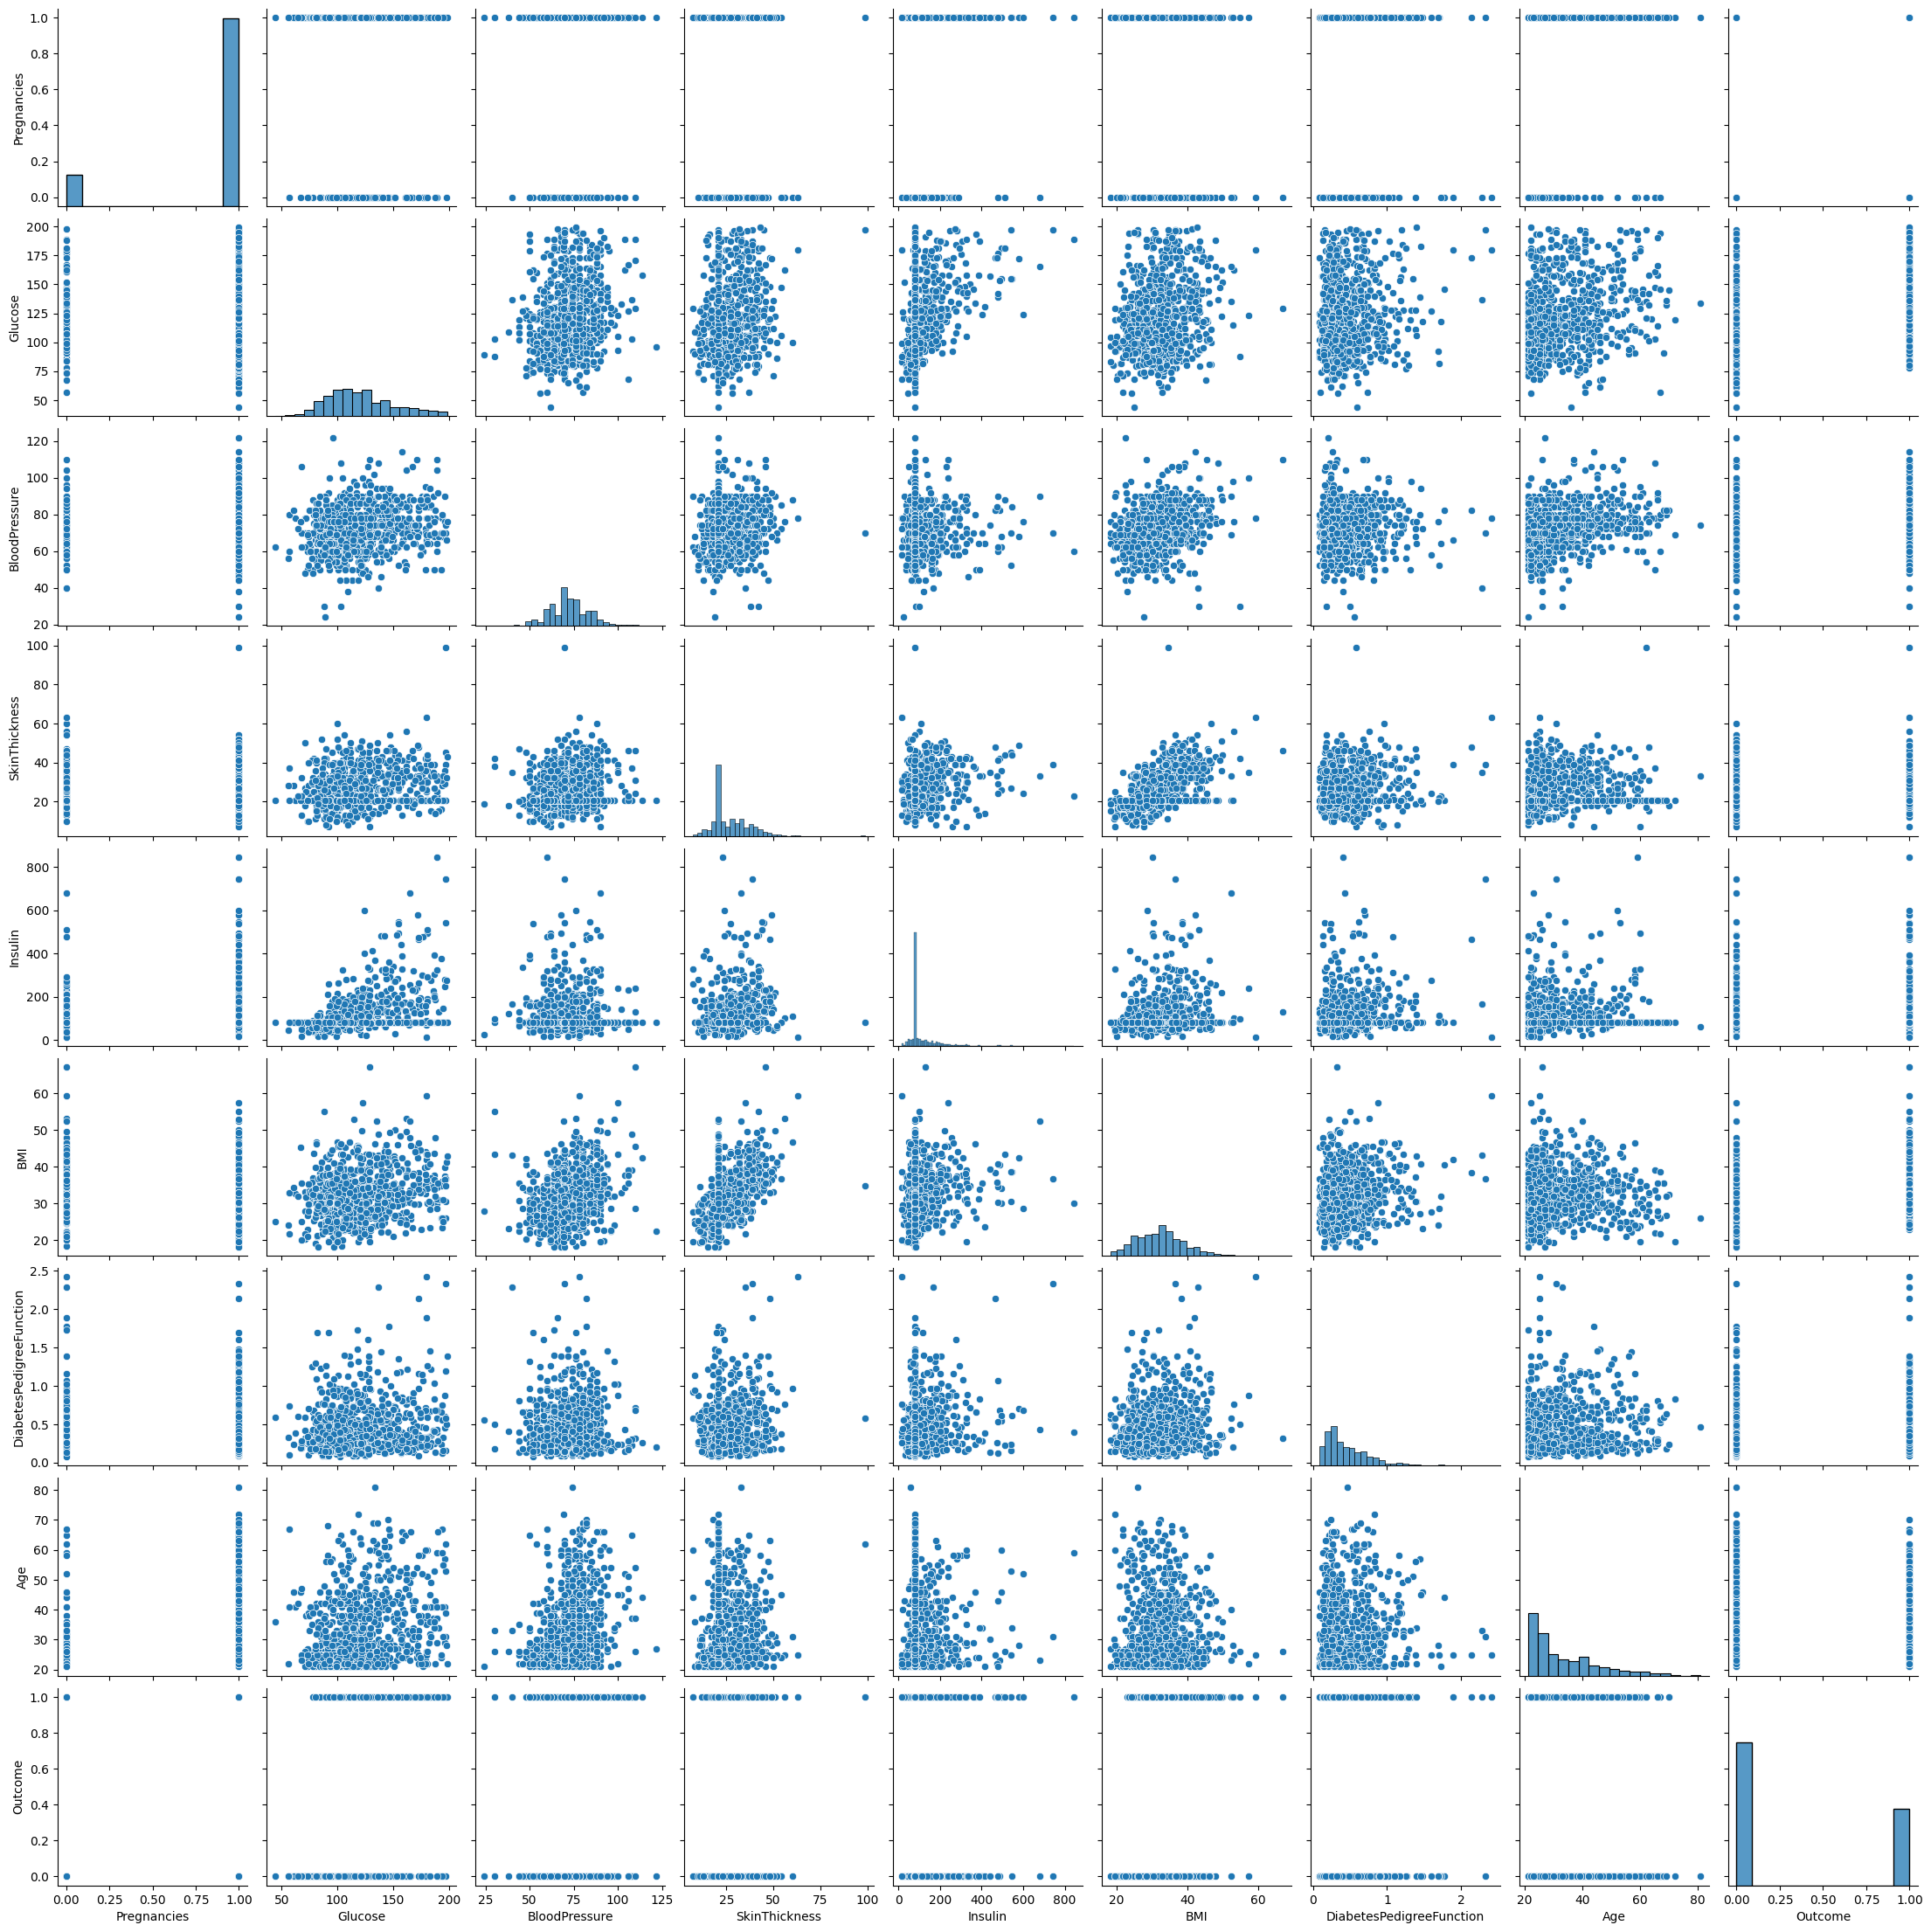

In [ ]:
sns.pairplot(data2)


<Axes: >

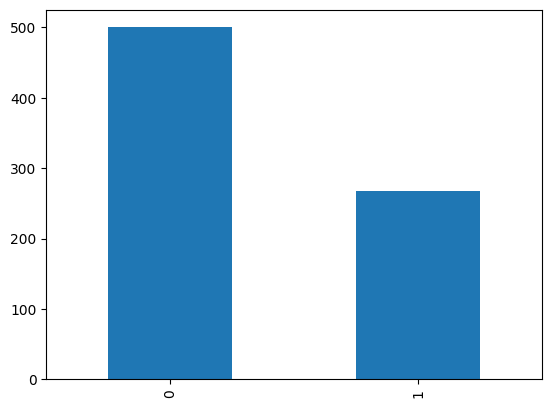

In [ ]:
data2.Outcome.value_counts().plot(kind='bar')


#splitting the data

In [ ]:
#sperate the features and the data
x=data2.drop('Outcome',axis=1).values
y = data2['Outcome'].values

In [ ]:
x.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.50, random_state = 42)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(x_valid))

537
116
115


In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)
x_valid  =scaler.transform(x_valid)

#Random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_train = rfc.predict(x_train)
y_pred_valid = rfc.predict(x_valid)

In [ ]:
train_acc =  metrics.accuracy_score(y_train, y_pred_train)
valid_acc = metrics.accuracy_score(y_valid, y_pred_valid)


In [ ]:
print('train acc:',train_acc)

train acc: 1.0


In [ ]:
print('train acc:',valid_acc)

train acc: 0.7130434782608696


In [ ]:
y_pred_test = rfc.predict(x_test)
test_acc = metrics.accuracy_score(y_test, y_pred_test)


In [ ]:
print('trest_acc:',test_acc)

trest_acc: 0.7241379310344828


#cross_validation to avoid overfitting in random forest classifier

In [ ]:
from sklearn.model_selection import StratifiedKFold

because data is unbalanced we use stratifiedKfold

In [ ]:
#evaluation using cross validation
num_splits = 5
kfold = StratifiedKFold(num_splits, shuffle= True, random_state = 1)
train_accs, test_accs = [], []
for train_index, test_index in kfold.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rfc.fit(x_train, y_train)
    y_pred_train = rfc.predict(x_train)
    y_pred_test = rfc.predict(x_test)

    train_accs.append(metrics.accuracy_score(y_train, y_pred_train) * 100)
    test_accs.append(metrics.accuracy_score(y_test, y_pred_test) * 100)

In [ ]:
ave_train_acc = 0
ave_test_acc = 0

print("\t","Training_Acc","\t","\t", "Testing_Acc")

for i in range(num_splits):
    print(i,"\t", train_accs[i],"\t", test_accs[i])

    ave_train_acc+= train_accs[i]/num_splits
    ave_test_acc+= test_accs[i]/num_splits

print("Av", "\t", ave_train_acc,"\t", ave_test_acc)

	 Training_Acc 	 	 Testing_Acc
0 	 100.0 	 74.02597402597402
1 	 100.0 	 77.27272727272727
2 	 100.0 	 79.87012987012987
3 	 100.0 	 73.8562091503268
4 	 100.0 	 73.20261437908496
Av 	 100.0 	 75.6455309396486


#evaluation performance for random forest  model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.61      0.51      0.56        53

    accuracy                           0.72       153
   macro avg       0.69      0.67      0.68       153
weighted avg       0.71      0.72      0.71       153



#split the data for svm model

In [ ]:
#sperate the features and the data
x=data2.drop('Outcome',axis=1).values
y = data2['Outcome'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.50, random_state = 42)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(x_valid))

537
116
115


In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)
x_valid  =scaler.transform(x_valid)

#SVM model

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_test = classifier.predict(x_test)
test_acc = metrics.accuracy_score(y_test, y_pred_test)

In [ ]:
print(test_acc)

0.7586206896551724


#cross_validation to avoid overfitting for svm model

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
#evaluation using cross validation
num_splits = 5
kfold = StratifiedKFold(num_splits, shuffle= True, random_state = 1)
train_accs, test_accs = [], []
for train_index, test_index in kfold.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(x_train, y_train)
    y_pred_train = classifier.predict(x_train)
    y_pred_test = classifier.predict(x_test)

    train_accs.append(metrics.accuracy_score(y_train, y_pred_train) * 100)
    test_accs.append(metrics.accuracy_score(y_test, y_pred_test) * 100)

In [ ]:
ave_train_acc = 0
ave_test_acc = 0

print("\t","Training_Acc","\t","\t", "Testing_Acc")

for i in range(num_splits):
    print(i,"\t", train_accs[i],"\t", test_accs[i])

    ave_train_acc+= train_accs[i]/num_splits
    ave_test_acc+= test_accs[i]/num_splits

print("Av", "\t", ave_train_acc,"\t", ave_test_acc)

	 Training_Acc 	 	 Testing_Acc
0 	 78.17589576547232 	 74.02597402597402
1 	 76.8729641693811 	 79.87012987012987
2 	 77.0358306188925 	 80.51948051948052
3 	 78.53658536585367 	 75.81699346405229
4 	 78.21138211382113 	 72.54901960784314
Av 	 77.76653160668414 	 76.55631949749598


#evaluation performance for SVM  model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.51      0.56        53

    accuracy                           0.73       153
   macro avg       0.70      0.67      0.68       153
weighted avg       0.72      0.73      0.72       153



#split the data for descion tree model

In [ ]:
#sperate the features and the data
x=data2.drop('Outcome',axis=1).values
y = data2['Outcome'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.50, random_state = 42)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(x_valid))

537
116
115


In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)
x_valid  =scaler.transform(x_valid)

#Descion tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_test = model.predict(x_test)
test_acc = metrics.accuracy_score(y_test, y_pred_test)

In [ ]:
print(test_acc)

0.6982758620689655


#cross validation to avoid overfitting in descion tree model

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
#evaluation using cross validation
num_splits = 5
kfold = StratifiedKFold(num_splits, shuffle= True, random_state = 1)
train_accs, test_accs = [], []
for train_index, test_index in kfold.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    train_accs.append(metrics.accuracy_score(y_train, y_pred_train) * 100)
    test_accs.append(metrics.accuracy_score(y_test, y_pred_test) * 100)

In [ ]:
ave_train_acc = 0
ave_test_acc = 0

print("\t","Training_Acc","\t","\t", "Testing_Acc")

for i in range(num_splits):
    print(i,"\t", train_accs[i],"\t", test_accs[i])

    ave_train_acc+= train_accs[i]/num_splits
    ave_test_acc+= test_accs[i]/num_splits

print("Av", "\t", ave_train_acc,"\t", ave_test_acc)

	 Training_Acc 	 	 Testing_Acc
0 	 100.0 	 68.18181818181817
1 	 100.0 	 64.93506493506493
2 	 100.0 	 76.62337662337663
3 	 100.0 	 69.93464052287581
4 	 100.0 	 71.24183006535948
Av 	 100.0 	 70.18334606569901


#evaluation performance for descion tree model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       100
           1       0.60      0.53      0.56        53

    accuracy                           0.71       153
   macro avg       0.68      0.67      0.67       153
weighted avg       0.71      0.71      0.71       153



#confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_test)


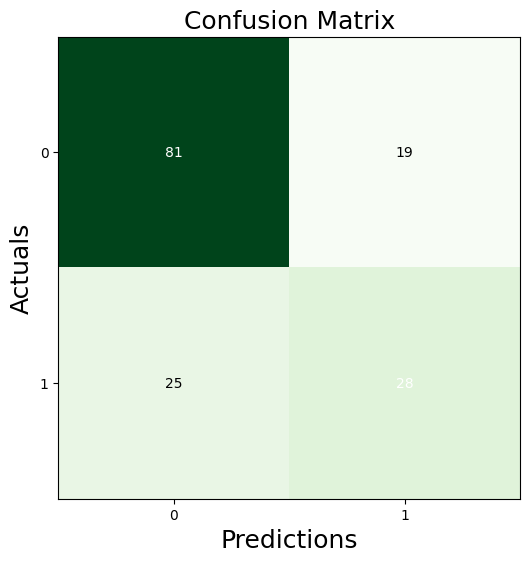

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()